<a href="https://colab.research.google.com/github/huang12211/MIT_ML_AI_Course_FacialEmotionDetection/blob/main/Facial_Emotion_Detection_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**

## **Problem Definition**

**The context:**
Deep Learning has found applications in many predictive tasks relating to more unstructured forms of data over the last few years, such as images, text, audio and video. Many of these tasks seem to be in the vein of a larger direction of predictive modeling that aims to match human-level performance on such tasks, because humans have evolved to specialize in performing intelligent actions on such unstructured data. As a specific branch of AI (also called Affective Computing or Emotion AI) Artificial Emotional Intelligence stands for the study and development of technologies and computers that can read human emotions by means of analyzing body gestures, facial expressions, voice tone, etc. and react appropriately to them.
In the field of human-machine interaction, facial expression recognition is critical. From recent research, it has been found that as much as 55% of communication of sentiment takes place through facial expressions and other visual cues. Therefore, training a model to identify facial emotions accurately is an important step towards the development of emotionally intelligent
behavior in machines with AI capabilities. Automatic facial expression recognition systems could have many applications, including but not limited to any use case that requires human behavior understanding, detection of mental disorders, and creating a higher quality of virtual assistant for customer-facing businesses.<br>

**The objectives:**
The goal of this project is to use Deep Learning and Artificial Intelligence techniques to create a computer vision model that can accurately detect facial emotions. The model should be able to perform multi-class classification on images of facial expressions, to classify the expressions according to the associated emotion.<br>

**The key questions:**
- What are the emotions that are available to us in the dataset?
- What are the weaknesses of the dataset provided?
- What data enhancement methods can be used to optimize the dataset used to train the model?
- Which model had the highest accuracy while remaining realistic in terms of ressources required to implement?
-How does the selected model perform on the provided dataset?
- What are the next steps to ensure the robustness of the model in real-world applications?

**The problem formulation:** What are we trying to solve using data science?
In this case, we are attempting to use data science principles to be able to differentiate human emotions of happiness, sadness, baseline and surprise using images of human facial expressions.


## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
#Importing general libraries
import numpy as np
import pandas as pd
import os
import zipfile
import cv2
import random

#Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Importing Deep Learning Libraries
import torch
import tensorflow as tf
from keras import callbacks
from tensorflow.keras.utils import load_img, img_to_array, image_dataset_from_directory, to_categorical
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, LeakyReLU, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import backend, optimizers
from tensorflow.keras.optimizers import Adam, SGD, Adamax, RMSprop

In [ ]:
print(tf.__version__)

2.15.0


### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/MIT-Data Science Certif Course/CapstoneProject/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()


In [ ]:
folder_path = '/content/Facial_emotion_images/'
emotions = ['happy', 'neutral', 'sad', 'surprise']
picture_size = 48

# Storing all the training images
training_data = []
def create_training_data():
    for emotion in emotions:                                                   # Looping over each img from the emotions list
        path = os.path.join(folder_path + 'train/', emotion)                   # Joining images with labels
        class_num = emotion

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data

            new_array = cv2.resize(img_array, (picture_size, picture_size))    # Resizing the images

            training_data.append([new_array, class_num])                       # Appending both the images and labels

# Storing all the validation images
validation_data = []
def create_validation_data():
    for emotion in emotions:                                                   # Looping over each img from the emotions list
        path = os.path.join(folder_path + 'validation/', emotion)              # Joining images with labels
        class_num = emotion

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data

            new_array = cv2.resize(img_array, (picture_size, picture_size))    # Resizing the images

            validation_data.append([new_array, class_num])                     # Appending both the images and labels

# Storing all the test images
test_data = []
def create_test_data():
    for emotion in emotions:                                                   # Looping over each img from the emotions list
        path = os.path.join(folder_path + 'test/', emotion)                    # Joining images with labels
        class_num = emotion

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data

            new_array = cv2.resize(img_array, (picture_size, picture_size))    # Resizing the images

            test_data.append([new_array, class_num])                           # Appending both the images and labels

create_training_data()
create_validation_data()
create_test_data()

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

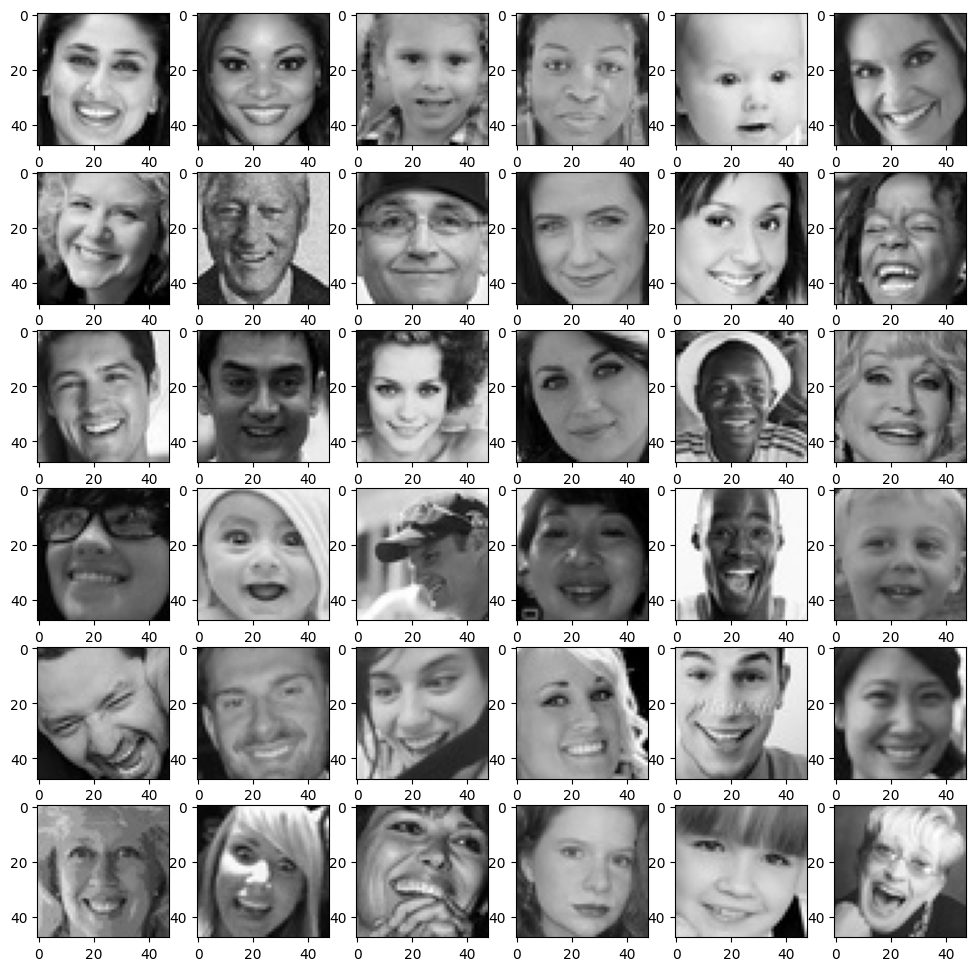

In [ ]:
#Plot uncompressed images
image_label = 'happy'
plt.figure(figsize = (12, 12))
for i in range(1, 37, 1):
    plt.subplot(6, 6, i)
    img = load_img(folder_path + "train/" + image_label + "/" +
                  os.listdir(folder_path + "train/" + image_label)[i])
    plt.imshow(img)

plt.show()

**Observations and Insights:** The images falling into the happy class are characterized by squinted eyes and a smile.

### **Sad**

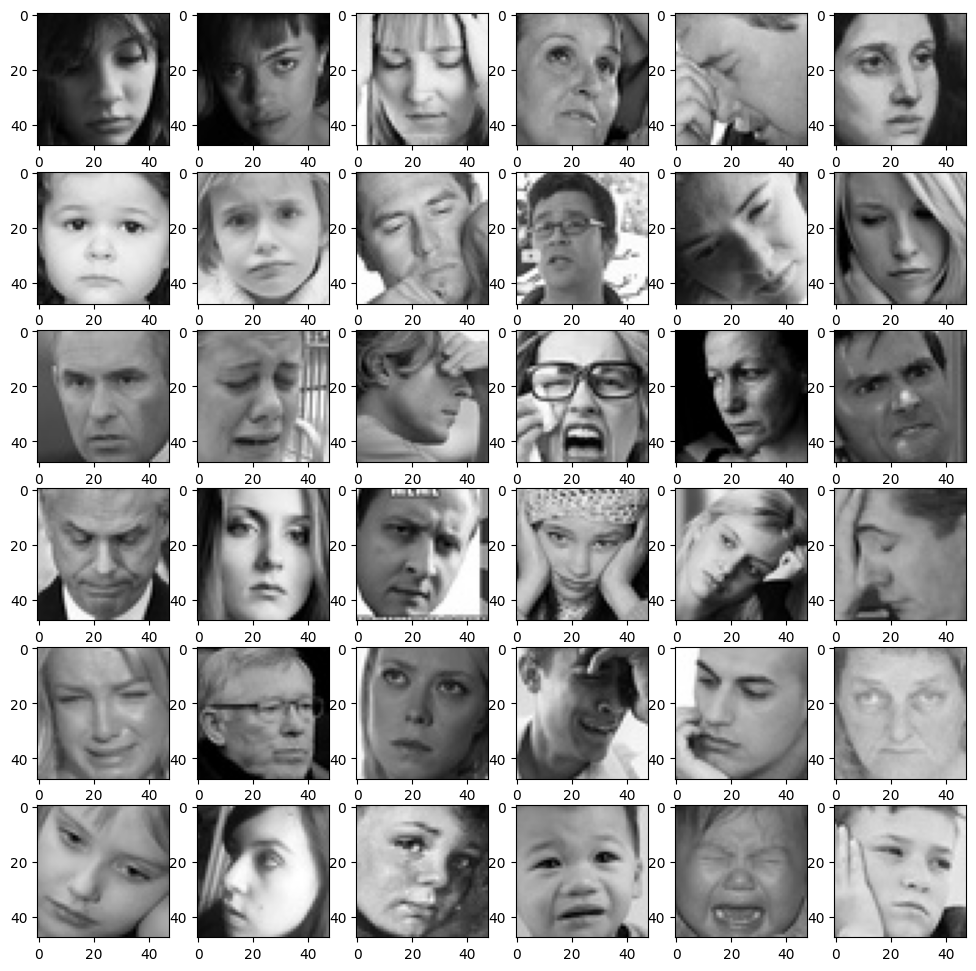

In [ ]:
#Plot uncompressed images
image_label = 'sad'
plt.figure(figsize = (12, 12))
for i in range(1, 37, 1):
    plt.subplot(6, 6, i)
    img = load_img(folder_path + "train/" + image_label + "/" +
                  os.listdir(folder_path + "train/" + image_label)[i])
    plt.imshow(img)

plt.show()

**Observations and Insights:**
The images falling into the sad/upset class have frowns and tend to have eyebrows that tilt upwards as you move from the edges of the face towards the center of the face. There seem to also be some images in the dataset that are not of faces. Therefore developping something to remove images that do not contain faces from the dataset could be worth exploring.  

### **Neutral**

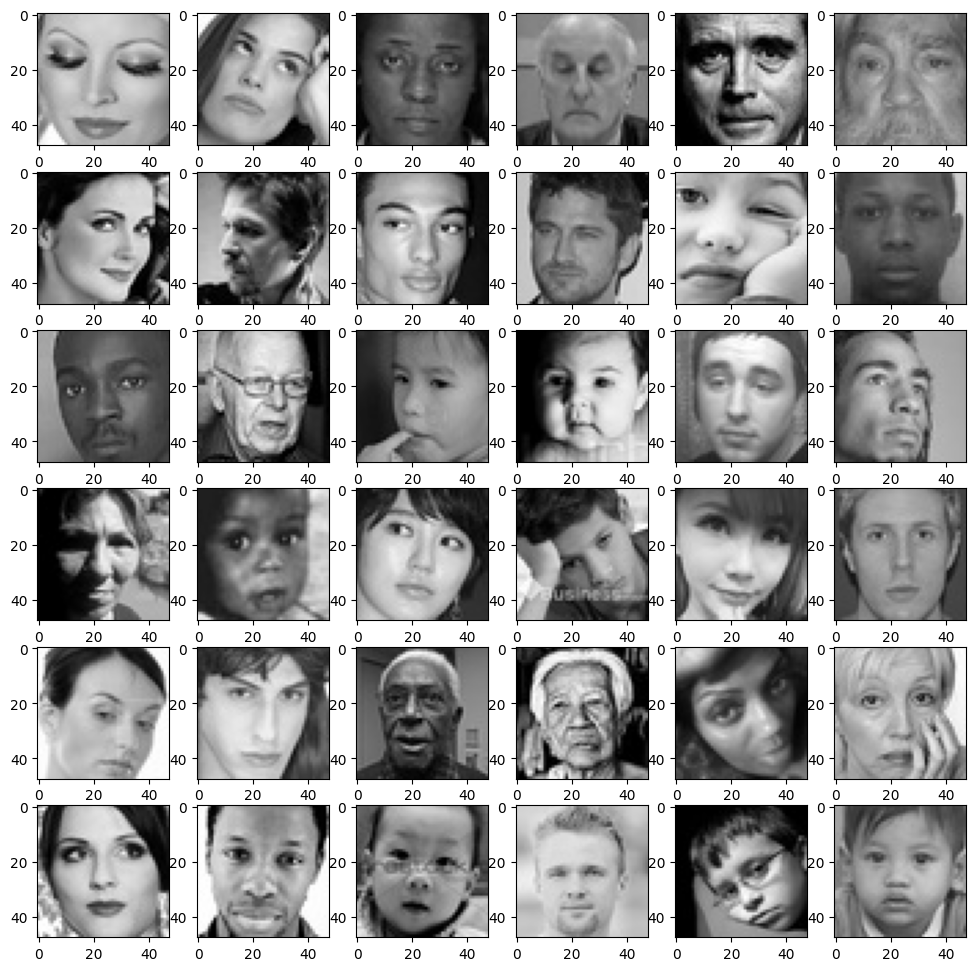

In [ ]:
#Plot uncompressed images
image_label = 'neutral'
plt.figure(figsize = (12, 12))
for i in range(1, 37, 1):
    plt.subplot(6, 6, i)
    img = load_img(folder_path + "train/" + image_label + "/" +
                  os.listdir(folder_path + "train/" + image_label)[i])
    plt.imshow(img)

plt.show()

**Observations and Insights:** The images falling into the neutral category seem to have straight lips and straight-on gazes while the eyebrows also lie straight. Again, we observe that there are some images that are not ove faces. Therefore removing these images can help us to increase performance of the model.

### **Surprised**

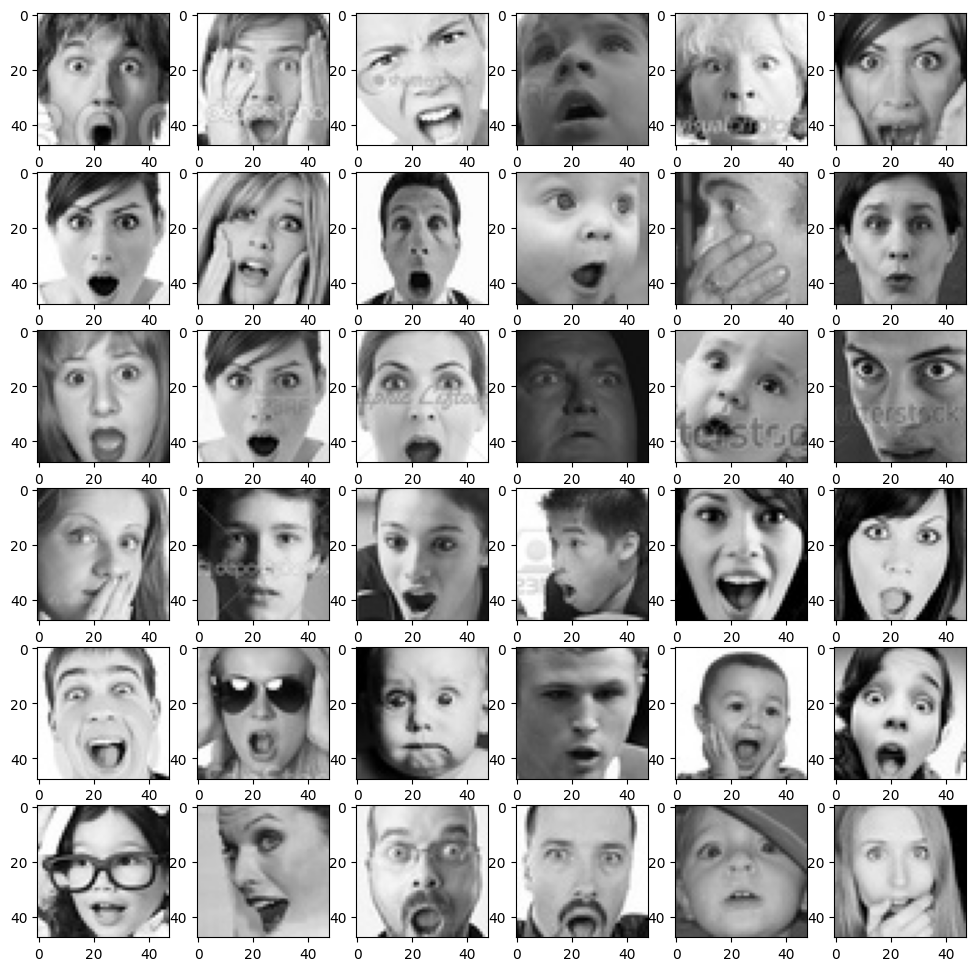

In [ ]:
#Plot uncompressed images
image_label = 'surprise'
plt.figure(figsize = (12, 12))
for i in range(1, 37, 1):
    plt.subplot(6, 6, i)
    img = load_img(folder_path + "train/" + image_label + "/" +
                  os.listdir(folder_path + "train/" + image_label)[i])
    plt.imshow(img)

plt.show()

**Observations and Insights:** The images in the surprise class have eyes that are much larger than the images in the other classes where the ratio of eye-whites to pupils is larger. The mouth is also often in the shape of an O and hands are typically placed near the face.  

## **Checking Distribution of Classes**

Text(0.5, 1.0, 'test_d')

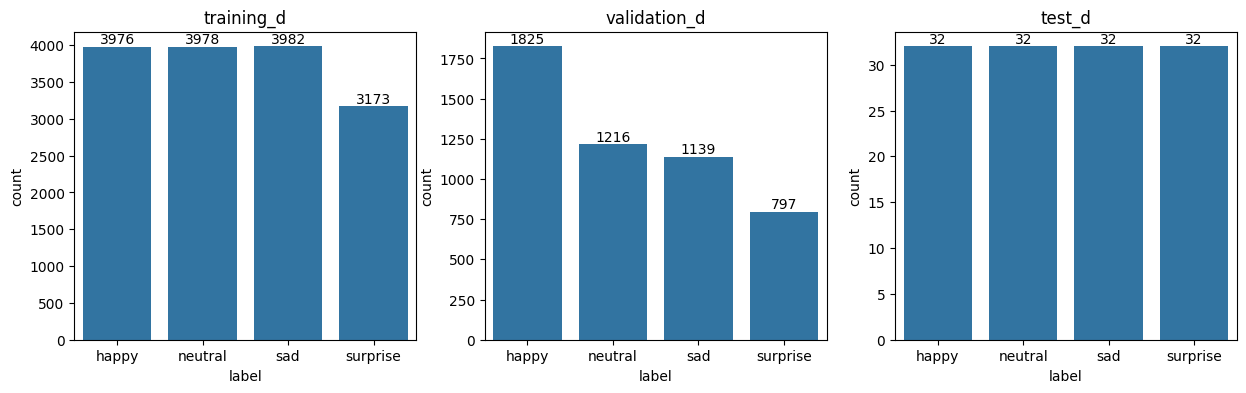

In [ ]:
#Visualize the distribution of classes in the training data
training_d = pd.DataFrame(training_data, columns = ['img', 'label'])
validation_d = pd.DataFrame(validation_data, columns = ['img', 'label'])
test_d = pd.DataFrame(test_data, columns = ['img', 'label'])
# print(training_d.head())

#plot the data
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

#plot the training data
a0 = sns.countplot(ax=axes[0], data = training_d, x="label")
axes[0].bar_label(a0.containers[0])
axes[0].set_title('training_d')

#plot the validation data
a1 = sns.countplot(ax=axes[1], data = validation_d, x="label")
axes[1].bar_label(a1.containers[0])
axes[1].set_title('validation_d')

#plot the test data
a2 = sns.countplot(ax=axes[2], data = test_d, x="label")
axes[2].bar_label(a2.containers[0])
axes[2].set_title('test_d')

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

### **Observations:**
- The training data is not balanced. There are around 800 less images of faces in the surprise class compared to all of the other classes of images. This imbalance in the dataset is an issue since it will mean that the model will likely be unable to accurate identify faces that are surprised due to the lower number of images available to it to learn from.
- The validation data is not balanced. There are around 700 more images of faces that are happy compared to the the images of faces that are neutral or sad. Moreover, there are around 350 less images of faces that are surprised compared to the images of faces that are neutral or sad. This is not a problem because the model's performance is not fine-tuned based on the validation data. However it is a problem in the sense that since the test data is balanced, the accuracy reported on an validation dataset is not representative of the accuracy on the test dataset.   
- The test data is perfectly balanced.

We can therefore perform some Data Augmentation on the training data so that we can introduce more surprised images and remove this negative bias from the dataset.

## **Data Augmentation**

Here we will augment the training data so that the classes are balanced.

CNNs have the property of translational invariance, i.e., they can recognize an object as an object, even when its appearance varies translationally in some way. Taking this property into consideration, we can augment the images of all classes using the following techniques:
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>

***Data augmentation will not be used in the validation/test data set***.
Zoom will not be used for fear of cropping out the mouth or eyes which are the most used by humans to identify emotions.



In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

training_data_aug = training_data

#Adding more surprised images to the dataset.
for i in range(0, 800):
  rand_case = random.randint(1, 6)
  rand_source_img = random.randint(0, 3172)

  source_img = training_data[rand_source_img][0]
  # print(source_img)

  match rand_case:
    case 1:
      modified_img = tf.image.flip_left_right(source_img)
    case 2:
      modified_img = tf.image.flip_up_down(source_img)
    case 3:
      rand_offset = random.random()
      modified_img = tf.image.pad_to_bounding_box(source_img, int(rand_offset), 0, picture_size, picture_size)
    case 4:
      rand_offset = random.random()
      modified_img = tf.image.pad_to_bounding_box(source_img, 0, int(rand_offset), picture_size, picture_size)
    case 5: #rotate 90 counter-clockwise
      modified_img = tf.image.rot90(source_img, k=1, name=None)
    case 6: #rotate 270 counter-clockwise
      modified_img = tf.image.rot90(source_img, k=3, name=None)
    case _:
      print("Number not between 1 and 6")

  # visualize(source_img, modified_img)
  training_data_aug.append([modified_img, 'surprise'])

(48, 48, 3)


[Text(0, 0, '3976'),
 Text(0, 0, '3978'),
 Text(0, 0, '3982'),
 Text(0, 0, '3973')]

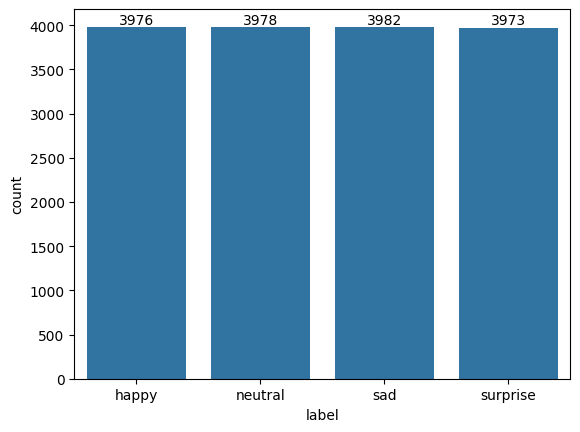

In [ ]:
#Visualize the distribution of classes in the training data
training_d_aug = pd.DataFrame(training_data_aug, columns = ['img', 'label'])
print(training_d_aug.iloc[0][0].shape) #dimensions of images

#plot the augmented training data
a3 = sns.countplot(data = training_d_aug, x="label")
a3.bar_label(a3.containers[0])

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
# Creating two different lists to store the training data
X_train = []
y_train = []

np.random.shuffle(training_data_aug)                                           # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in training_data_aug:                                      # Iterating over the training data which is generated from the create_training_data() function
    X_train.append(features)                                                   # Appending images into X_train
    y_train.append(label)                                                      # Appending labels into y_train

# Creating two different lists to store the validation data
X_val = []
y_val = []

np.random.shuffle(validation_data)                                             # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in validation_data:                                        # Iterating over the training data which is generated from the create_testing_data() function
    X_val.append(features)                                                     # Appending images into X_test
    y_val.append(label)                                                        # Appending labels into y_test

# Creating two different lists to store the test data
X_test = []
y_test = []

np.random.shuffle(test_data)                                                   # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in test_data:                                              # Iterating over the training data which is generated from the create_testing_data() function
    X_test.append(features)                                                    # Appending images into X_test
    y_test.append(label)                                                       # Appending labels into y_test


In [ ]:
#Create grayscale version of all datasets
X_train_g = []
X_val_g = []
X_test_g = []

for i in range(len(X_train)):
  X_train_g.append(tf.image.rgb_to_grayscale(X_train[i]))

for i in range(len(X_val)):
  X_val_g.append(tf.image.rgb_to_grayscale(X_val[i]))

for i in range(len(X_test)):
  X_test_g.append(tf.image.rgb_to_grayscale(X_test[i]))


In [ ]:
# Converting the array into Numpy array
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


X_train_g = np.array(X_train_g)
X_val_g = np.array(X_val_g)
X_test_g = np.array(X_test_g)

print(X_train_g.shape)
print(X_val_g.shape)
print(X_test_g.shape)

(15909, 48, 48, 3)
(4977, 48, 48, 3)
(128, 48, 48, 3)
(15909, 48, 48, 1)
(4977, 48, 48, 1)
(128, 48, 48, 1)


In [ ]:
# Normalizing the image data
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

X_train_g = X_train_g/255.0
X_val_g = X_val_g/255.0
X_test_g = X_test_g/255.0

In [ ]:
#Encoding the labels of the training data
y_train = pd.DataFrame(y_train)
y_train_encoded = []

for label in y_train[0]:
  if('happy' in label):
    y_train_encoded.append(0)

  if('neutral' in label):
    y_train_encoded.append(1)

  if('sad' in label):
    y_train_encoded.append(2)

  if('surprise' in label):
    y_train_encoded.append(3)

y_train_encoded = to_categorical(y_train_encoded, 4)
print(len(y_train_encoded))

#Encoding the labels of the validation data
y_val = pd.DataFrame(y_val)
y_val_encoded = []

for label in y_val[0]:
  if('happy' in label):
    y_val_encoded.append(0)

  if('neutral' in label):
    y_val_encoded.append(1)

  if('sad' in label):
    y_val_encoded.append(2)

  if('surprise' in label):
    y_val_encoded.append(3)

y_val_encoded = to_categorical(y_val_encoded, 4)
print(len(y_val_encoded))

#Encoding the labels of the test data
y_test = pd.DataFrame(y_test)
y_test_encoded = []

for label in y_test[0]:
  if('happy' in label):
    y_test_encoded.append(0)

  if('neutral' in label):
    y_test_encoded.append(1)

  if('sad' in label):
    y_test_encoded.append(2)

  if('surprise' in label):
    y_test_encoded.append(3)

y_test_encoded = to_categorical(y_test_encoded, 4)
print(len(y_test_encoded))

15909
4977
128


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

**Ans:** <br>
Yes, CNNs are the right approach here.
One of the main challenges of using ANNs for image classification is that they do not take into account the spatial structure of the image. ANNs treat each pixel as an independent feature, which can lead to poor performance on tasks that require spatial reasoning, such as object recognition.
To handle the spatial structure of pictures, neural networks can be classified as convolutional neural networks (CNNs). CNNs employ convolutional layers, which subject the input picture to several teachable filters. Each filter provides a feature map that indicates the locations of the features it has detected in the picture, such as an edge or texture.
CNNs have several benefits over ANNs. They are more adapted to capture the spatial structure of pictures, which is one of their key advantages. Convolutional layers, such as edges, lines, and forms, are used by CNNs to recognize patterns in pictures. As a result, CNNs can automatically extract pertinent characteristics from pictures, which increases their efficiency for challenging image classification tasks like locating certain items in an image.
CNNs are more effective than ANNs is another benefit. Images feature a lot of spatial redundancy, which CNNs are made to make use of. The number of parameters in the network may be drastically decreased by employing shared weights in the convolutional layers, resulting in a network that is more effective and simpler to train.

### **Creating the Base CNN**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn_model_1():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call cnn_model_1 function
model_a = cnn_model_1()

# Generating the summary of the model
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

In [ ]:
# The following lines of code saves the best model's parameters if training accuracy goes down on further training

validation_tuple = ((X_val), (y_val_encoded))
print(len(validation_tuple))

# Fit the model
history = model_a.fit(X_train,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      verbose=1)

2
Epoch 1/20
125/125 [==============================] - 9s 17ms/step - loss: 1.4783 - accuracy: 0.3966 - val_loss: 1.4066 - val_accuracy: 0.2845
Epoch 2/20
125/125 [==============================] - 1s 9ms/step - loss: 1.1000 - accuracy: 0.5306 - val_loss: 1.4963 - val_accuracy: 0.2580
Epoch 3/20
125/125 [==============================] - 1s 9ms/step - loss: 0.9949 - accuracy: 0.5854 - val_loss: 1.1428 - val_accuracy: 0.4929
Epoch 4/20
125/125 [==============================] - 1s 9ms/step - loss: 0.9380 - accuracy: 0.6129 - val_loss: 0.9516 - val_accuracy: 0.6138
Epoch 5/20
125/125 [==============================] - 1s 9ms/step - loss: 0.8881 - accuracy: 0.6327 - val_loss: 1.0249 - val_accuracy: 0.5654
Epoch 6/20
125/125 [==============================] - 1s 9ms/step - loss: 0.8488 - accuracy: 0.6491 - val_loss: 0.8212 - val_accuracy: 0.6771
Epoch 7/20
125/125 [==============================] - 1s 9ms/step - loss: 0.8142 - accuracy: 0.6716 - val_loss: 0.7699 - val_accuracy: 0.6948
Epo

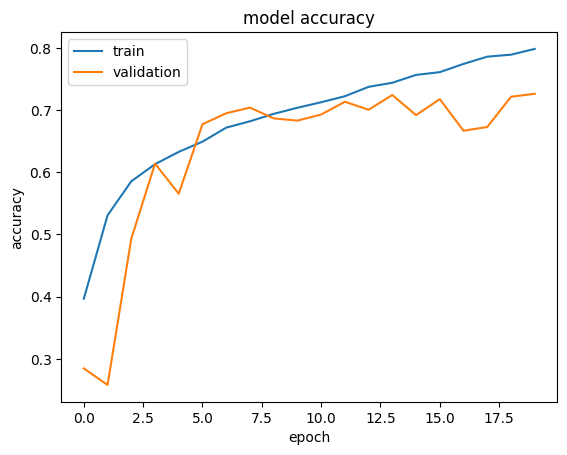

In [ ]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_a.evaluate(X_test, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 5ms/step - loss: 0.6849 - accuracy: 0.7422


**Observations and Insights:**
Here, we have been able to achieve an accuracy of 74.2%. We can see that the training accuracy keeps increasing, but that the validation accuracy has plateaued, indicating that the model is starting to overfit the data.

### **Testing the same Base CNN with Greyscale images**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn_model_1b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_1b = cnn_model_1b()

# Generating the summary of the model
model_1b.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

In [ ]:
validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

# Fit the model
history = model_1b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      verbose=1)

2
Epoch 1/20
125/125 [==============================] - 4s 12ms/step - loss: 1.5215 - accuracy: 0.3633 - val_loss: 1.4046 - val_accuracy: 0.2443
Epoch 2/20
125/125 [==============================] - 1s 8ms/step - loss: 1.1520 - accuracy: 0.5010 - val_loss: 1.3856 - val_accuracy: 0.4163
Epoch 3/20
125/125 [==============================] - 1s 9ms/step - loss: 1.0242 - accuracy: 0.5711 - val_loss: 1.1055 - val_accuracy: 0.5403
Epoch 4/20
125/125 [==============================] - 1s 8ms/step - loss: 0.9496 - accuracy: 0.6083 - val_loss: 0.9542 - val_accuracy: 0.6205
Epoch 5/20
125/125 [==============================] - 1s 8ms/step - loss: 0.8901 - accuracy: 0.6285 - val_loss: 0.9651 - val_accuracy: 0.6120
Epoch 6/20
125/125 [==============================] - 1s 8ms/step - loss: 0.8359 - accuracy: 0.6598 - val_loss: 0.8284 - val_accuracy: 0.6731
Epoch 7/20
125/125 [==============================] - 1s 9ms/step - loss: 0.8014 - accuracy: 0.6787 - val_loss: 0.7995 - val_accuracy: 0.6845
Epo

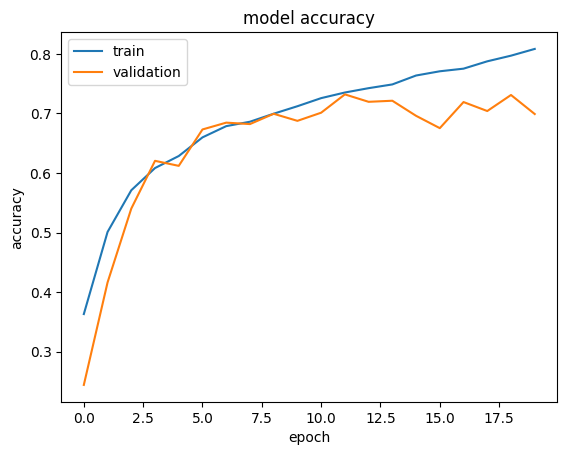

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_1b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 4ms/step - loss: 0.7794 - accuracy: 0.7344


**Observations and Insights:**
When the inputs to the model are in grayscale format instead of rgb, we can see that it does not really affect the performance of the model.

### **Creating a Larger CNN with Greyscale images**

- Try out a slightly larger architecture

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn_model_2():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2 = cnn_model_2()

# Generating the summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

In [ ]:
validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

# Fit the model
history = model_2.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      verbose=1)

2
Epoch 1/20
125/125 [==============================] - 5s 13ms/step - loss: 1.4323 - accuracy: 0.3900 - val_loss: 1.3447 - val_accuracy: 0.3667
Epoch 2/20
125/125 [==============================] - 1s 9ms/step - loss: 1.1041 - accuracy: 0.5227 - val_loss: 1.3954 - val_accuracy: 0.3032
Epoch 3/20
125/125 [==============================] - 1s 9ms/step - loss: 0.9905 - accuracy: 0.5828 - val_loss: 1.0944 - val_accuracy: 0.5296
Epoch 4/20
125/125 [==============================] - 1s 9ms/step - loss: 0.9261 - accuracy: 0.6137 - val_loss: 0.9504 - val_accuracy: 0.5947
Epoch 5/20
125/125 [==============================] - 1s 9ms/step - loss: 0.8852 - accuracy: 0.6343 - val_loss: 0.9961 - val_accuracy: 0.5915
Epoch 6/20
125/125 [==============================] - 1s 9ms/step - loss: 0.8374 - accuracy: 0.6567 - val_loss: 0.9118 - val_accuracy: 0.6301
Epoch 7/20
125/125 [==============================] - 1s 10ms/step - loss: 0.8191 - accuracy: 0.6680 - val_loss: 0.7799 - val_accuracy: 0.6914
Ep

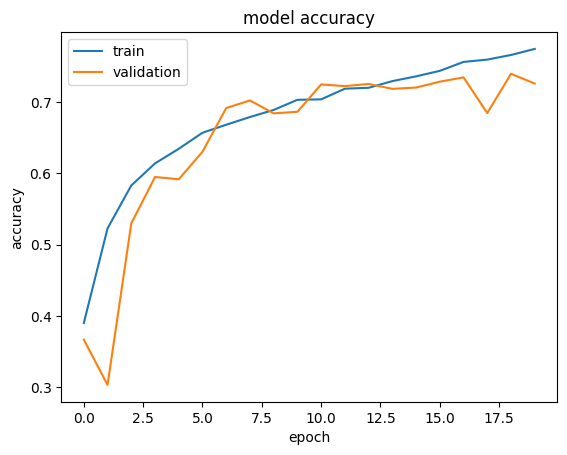

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 4ms/step - loss: 0.5844 - accuracy: 0.7812


##### **Larger CNN with Greyscale Images using Raw Dataset**


In [ ]:
batch_size = 128
emotions = ['happy', 'neutral', 'sad', 'surprise']

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()
datagen_test = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = emotions,
                                              shuffle = True)

validation_set = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = emotions,
                                              shuffle = True)

test_set = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = emotions,
                                              shuffle = True)

# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2 = cnn_model_2()

# Generating the summary of the model
model_2.summary()

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2.fit(train_set,
                      validation_data = validation_set,
                      epochs=30,
                      callbacks=[earlystopping],
                      verbose=1)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496  

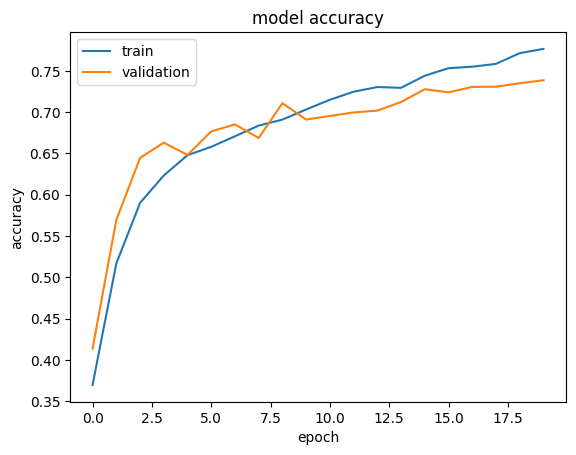

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2.evaluate(test_set, verbose = 1)

1/1 [==============================] - 0s 114ms/step - loss: 0.6609 - accuracy: 0.7344


**Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

**Insights:**<br>
The models did ok performance-wise. However, the size of the dataset is relatively small so they might perform better if we artificially increase the size of the training dataset. The greyscale images performed on a similar level to the rgb color mode. Therefore the rgb color mode is not needed since the images are already in grayscale form. The augmented balanced training dataset also resulted in a model that performed with a higher accuracy than the raw datset.   

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
batch_size = 128
emotions = ['happy', 'neutral', 'sad', 'surprise']

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()
datagen_test = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = emotions,
                                              shuffle = True)

validation_set = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = emotions,
                                              shuffle = True)

test_set = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = emotions,
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Compiling and Training the VGG16 Model using Balanced Training Dataset**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

In [ ]:
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it

x = Flatten()(transfer_layer.output) # Flatten the output from the 3rd block of the VGG16 model
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)


x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation = 'softmax')(x)

model_c = Model(vgg.input, pred) # Initializing the model

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
# Compiling the model
model_c.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
                metrics = ['accuracy'])

validation_tuple = ((X_val), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

## Fitting the VGG model
history = model_c.fit(X_train,
                      y_train_encoded,
                      validation_data= validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

2
Epoch 1/20
125/125 [==============================] - 4s 16ms/step - loss: 0.6491 - accuracy: 0.3821 - val_loss: 0.5779 - val_accuracy: 0.3747
Epoch 2/20
125/125 [==============================] - 1s 11ms/step - loss: 0.5331 - accuracy: 0.4628 - val_loss: 0.5142 - val_accuracy: 0.4844
Epoch 3/20
125/125 [==============================] - 1s 11ms/step - loss: 0.4912 - accuracy: 0.4938 - val_loss: 0.4776 - val_accuracy: 0.5278
Epoch 4/20
125/125 [==============================] - 1s 11ms/step - loss: 0.4738 - accuracy: 0.5143 - val_loss: 0.4666 - val_accuracy: 0.5308
Epoch 5/20
125/125 [==============================] - 1s 11ms/step - loss: 0.4635 - accuracy: 0.5299 - val_loss: 0.4557 - val_accuracy: 0.5439
Epoch 6/20
125/125 [==============================] - 1s 11ms/step - loss: 0.4550 - accuracy: 0.5398 - val_loss: 0.4591 - val_accuracy: 0.5347
Epoch 7/20
125/125 [==============================] - 1s 11ms/step - loss: 0.4484 - accuracy: 0.5528 - val_loss: 0.4548 - val_accuracy: 0.54

In [ ]:
# Function to plot loss, val_loss,
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

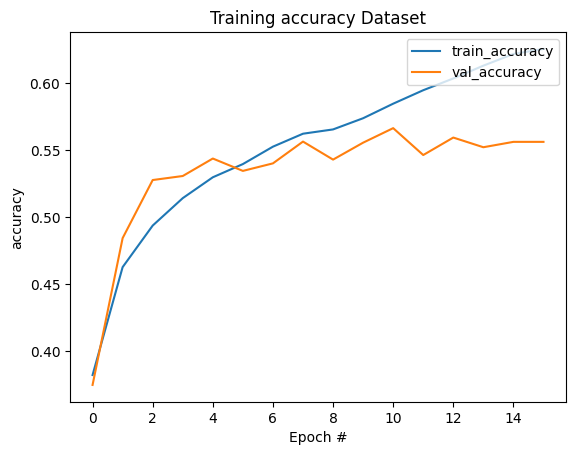

In [ ]:
# Plotting the loss vs epoch curve for the basic CNN model without Transfer Learning
plot_history(history)

In [ ]:
# Evaluating on the Test set
accuracy = model_c.evaluate(X_test, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 5ms/step - loss: 0.4456 - accuracy: 0.5312


**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:**
The trend in the training performance shows that the accuracy of the model on the training dataset continues to increase as the validation accuracy of the model plateaus. Therefore we can infer that the model has overfit the training data.

### **Compiling and Training the VGG16 Model using Raw Dataset**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

from keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it

x = Flatten()(transfer_layer.output) # Flatten the output from the 3rd block of the VGG16 model
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)


x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation = 'softmax')(x)

model_c = Model(vgg.input, pred) # Initializing the model

# Compiling the model
model_c.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
                metrics = ['accuracy'])


earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

## Fitting the VGG model
history = model_c.fit(train_set,
                      validation_data= validation_set,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

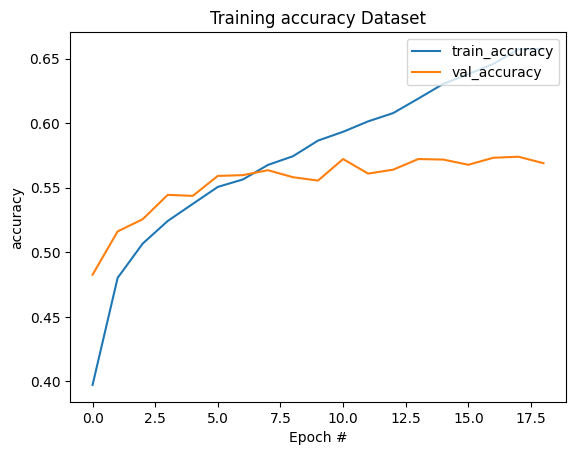

In [ ]:
# Function to plot loss, val_loss,
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

# Plotting the loss vs epoch curve for the model
plot_history(history)

In [ ]:
# Evaluating on the Test set
accuracy = model_c.evaluate(test_set, verbose = 1)

1/1 [==============================] - 0s 87ms/step - loss: 0.4665 - accuracy: 0.5547


### **Observations:**
It looks like using the raw data might be better than using the augmented balanced training data for VGG16. This might also be true for the CNN model. This must be investigated. However, the VGG16 model is still less accurate than our last CNN model.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

### **ResNet on Balanced Training Dataset**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras import Model

In [ ]:
#instantiate a base model with pre-trained weights
resnet = tf.keras.applications.ResNet50V2(include_top=False,
                                          weights='imagenet',
                                          input_shape=(48, 48, 3))

resnet.summary()

transfer_layer = resnet.get_layer('post_relu')

#freeze the base model
resnet.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output) # Flatten the output from the 5th block of the  model
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)


x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation = 'softmax')(x)

model_d = Model(resnet.input, pred) # Initializing the model

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 26, 26, 64)           0         ['conv1_conv[0][0]']          
                                                                                         

In [ ]:
# Compiling the model
model_d.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
                metrics = ['accuracy'])

validation_tuple = ((X_val), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

## Fitting the model
history = model_d.fit(X_train,
                      y_train_encoded,
                      validation_data= validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

2
Epoch 1/20
125/125 [==============================] - 7s 26ms/step - loss: 0.6461 - accuracy: 0.4088 - val_loss: 0.5407 - val_accuracy: 0.5061
Epoch 2/20
125/125 [==============================] - 2s 14ms/step - loss: 0.5176 - accuracy: 0.4981 - val_loss: 0.4838 - val_accuracy: 0.5397
Epoch 3/20
125/125 [==============================] - 2s 15ms/step - loss: 0.4679 - accuracy: 0.5435 - val_loss: 0.4487 - val_accuracy: 0.5696
Epoch 4/20
125/125 [==============================] - 2s 15ms/step - loss: 0.4360 - accuracy: 0.5805 - val_loss: 0.4369 - val_accuracy: 0.5754
Epoch 5/20
125/125 [==============================] - 2s 15ms/step - loss: 0.4087 - accuracy: 0.6103 - val_loss: 0.4326 - val_accuracy: 0.5732
Epoch 6/20
125/125 [==============================] - 2s 13ms/step - loss: 0.3789 - accuracy: 0.6499 - val_loss: 0.4599 - val_accuracy: 0.5401
Epoch 7/20
125/125 [==============================] - 2s 14ms/step - loss: 0.3535 - accuracy: 0.6797 - val_loss: 0.4402 - val_accuracy: 0.58

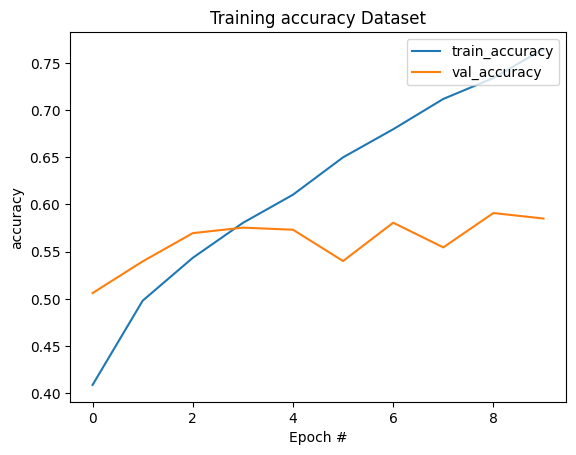

In [ ]:
# Function to plot loss, val_loss,
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

# Plotting the loss vs epoch curve for the model
plot_history(history)

In [ ]:
accuracy = model_d.evaluate(X_test, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 8ms/step - loss: 0.4074 - accuracy: 0.6172


### **ResNet on Raw Dataset**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

from keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras import Model

#instantiate a base model with pre-trained weights
resnet = tf.keras.applications.ResNet50V2(include_top=False,
                                          weights='imagenet',
                                          input_shape=(48, 48, 3))

resnet.summary()

transfer_layer = resnet.get_layer('post_relu')

#freeze the base model
resnet.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output) # Flatten the output from the 5th block of the  model
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)


x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation = 'softmax')(x)

model_d = Model(resnet.input, pred) # Initializing the model

# Compiling the model
model_d.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
                metrics = ['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

## Fitting the model
history = model_d.fit(train_set,
                      validation_data= validation_set,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 26, 26, 64)           0         ['conv1_conv[0][0]']          
                                                                                         

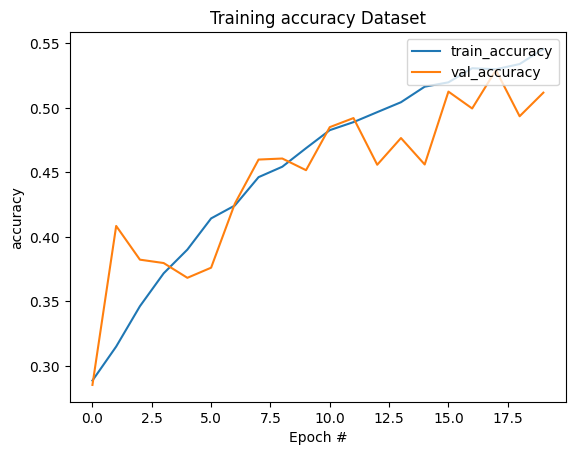

In [ ]:
# Function to plot loss, val_loss,
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

# Plotting the loss vs epoch curve for the model
plot_history(history)

In [ ]:
accuracy = model_d.evaluate(test_set, verbose = 1)

1/1 [==============================] - 0s 100ms/step - loss: 0.5084 - accuracy: 0.4609


### **Observations and Insights:**
Just like the VGG model, the Resnet model has overfit the training data. Unlike the VGG16 modle, the accuracy on the test set when trained on the balanced training dataset of 61.7% is also much better than the raw training dataset which in turn resulted in an test accuracy of 46.1%. However, the Resnet is still less accurate than our last CNN model.

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

### **EfficientNet on Balanced Augmented Data**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras import Model

In [ ]:
eff_net = tf.keras.applications.EfficientNetB0(include_top=False,
                                          weights='imagenet',
                                          input_shape=(48, 48, 3))

eff_net.summary()

transfer_layer = eff_net.get_layer('top_activation')

eff_net.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output) # Flatten the output from the 5th block of the  model
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)


x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation = 'softmax')(x)

model_e = Model(eff_net.input, pred) # Initializing the model

16705208/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescal

In [ ]:
# Compiling the model
model_e.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
                metrics = ['accuracy'])


# Unnormalize the image data
X_train = X_train*255.0
X_val = X_val*255.0
X_test = X_test*255.0

validation_tuple = ((X_val), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

## Fitting the model
history = model_e.fit(X_train,
                      y_train_encoded,
                      validation_data= validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

2
Epoch 1/20
125/125 [==============================] - 12s 33ms/step - loss: 0.6309 - accuracy: 0.4408 - val_loss: 0.5082 - val_accuracy: 0.5537
Epoch 2/20
125/125 [==============================] - 2s 16ms/step - loss: 0.5047 - accuracy: 0.5265 - val_loss: 0.4707 - val_accuracy: 0.5367
Epoch 3/20
125/125 [==============================] - 2s 15ms/step - loss: 0.4599 - accuracy: 0.5577 - val_loss: 0.4259 - val_accuracy: 0.5957
Epoch 4/20
125/125 [==============================] - 2s 15ms/step - loss: 0.4388 - accuracy: 0.5741 - val_loss: 0.4279 - val_accuracy: 0.5917
Epoch 5/20
125/125 [==============================] - 2s 15ms/step - loss: 0.4272 - accuracy: 0.5873 - val_loss: 0.4212 - val_accuracy: 0.5923
Epoch 6/20
125/125 [==============================] - 2s 15ms/step - loss: 0.4168 - accuracy: 0.5931 - val_loss: 0.4028 - val_accuracy: 0.6118
Epoch 7/20
125/125 [==============================] - 2s 15ms/step - loss: 0.4094 - accuracy: 0.6058 - val_loss: 0.4013 - val_accuracy: 0.6

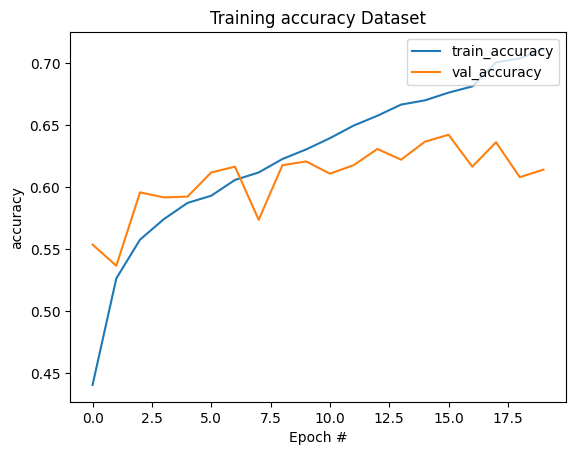

In [ ]:
# Function to plot loss, val_loss,
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

# Plotting the loss vs epoch curve for the basic CNN model without Transfer Learning
plot_history(history)

In [ ]:
accuracy = model_e.evaluate(X_test, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 12ms/step - loss: 0.4093 - accuracy: 0.6562


### **EfficientNet on Raw Dataset**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

from keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras import Model

eff_net = tf.keras.applications.EfficientNetB0(include_top=False,
                                          weights='imagenet',
                                          input_shape=(48, 48, 3))

eff_net.summary()

transfer_layer = eff_net.get_layer('top_activation')

eff_net.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output) # Flatten the output from the 5th block of the  model
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)


x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

pred = Dense(4, activation = 'softmax')(x)

model_e = Model(eff_net.input, pred) # Initializing the model

# Compiling the model
model_e.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
                metrics = ['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

## Fitting the model
history = model_e.fit(train_set,
                      validation_data= validation_set,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 48, 48, 3)            0         ['normalization[0

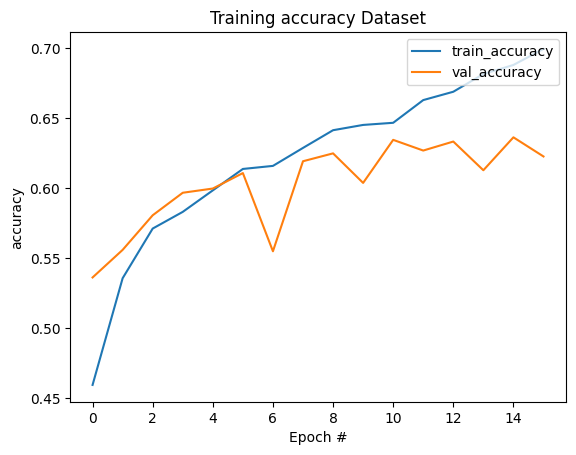

In [ ]:
# Function to plot loss, val_loss,
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

# Plotting the loss vs epoch curve for the model
plot_history(history)

In [ ]:
accuracy = model_e.evaluate(test_set, verbose = 1)

1/1 [==============================] - 0s 100ms/step - loss: 0.3736 - accuracy: 0.6406


### **Observations and Insights:**
The EfficientNet overfits the training dataset. Like ResNet, EfficientNet performed better when using the balanced training dataset than when using the raw dataset.

**Note: You can even go back and build your own architecture on top of the EfficientNet Transfer layer and see if you can improve the performance.**

## **Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode? <br>
<br>

**Ans:**<br>
All suggested Transfer Learning Architectures when used straight out of the box without any alterations overfit the training dataset which is why the test accuracy is always below 70%. VGG performed with an overall accuracy of 53.1%, ResNet's accuracy was 61.7% and EfficientNet's accuracy was 65.6%. In all cases, these models underperform compared to the CNN we built. <br>
<br>
The rgb color mode should not affect the results since the source images are provided in black and white and no manipulations to the datset affects their colors.

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

### **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
# Creating two different lists to store the training data
X_train = []
y_train = []

np.random.shuffle(training_data_aug)                                           # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in training_data_aug:                                      # Iterating over the training data which is generated from the create_training_data() function
    X_train.append(features)                                                   # Appending images into X_train
    y_train.append(label)                                                      # Appending labels into y_train

# Creating two different lists to store the validation data
X_val = []
y_val = []

np.random.shuffle(validation_data)                                             # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in validation_data:                                        # Iterating over the training data which is generated from the create_testing_data() function
    X_val.append(features)                                                     # Appending images into X_test
    y_val.append(label)                                                        # Appending labels into y_test

# Creating two different lists to store the test data
X_test = []
y_test = []

np.random.shuffle(test_data)                                                   # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in test_data:                                              # Iterating over the training data which is generated from the create_testing_data() function
    X_test.append(features)                                                    # Appending images into X_test
    y_test.append(label)                                                       # Appending labels into y_test

#Create grayscale version of all datasets
X_train_g = []
X_val_g = []
X_test_g = []

for i in range(len(X_train)):
  X_train_g.append(tf.image.rgb_to_grayscale(X_train[i]))

for i in range(len(X_val)):
  X_val_g.append(tf.image.rgb_to_grayscale(X_val[i]))

for i in range(len(X_test)):
  X_test_g.append(tf.image.rgb_to_grayscale(X_test[i]))

# Converting the array into Numpy array
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

X_train_g = np.array(X_train_g)
X_val_g = np.array(X_val_g)
X_test_g = np.array(X_test_g)

# Normalizing the image data
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

X_train_g = X_train_g/255.0
X_val_g = X_val_g/255.0
X_test_g = X_test_g/255.0

#Encoding the labels of the training data
y_train = pd.DataFrame(y_train)
y_train_encoded = []

for label in y_train[0]:
  if('happy' in label):
    y_train_encoded.append(0)

  if('neutral' in label):
    y_train_encoded.append(1)

  if('sad' in label):
    y_train_encoded.append(2)

  if('surprise' in label):
    y_train_encoded.append(3)

y_train_encoded = to_categorical(y_train_encoded, 4)
# print(len(y_train_encoded))

#Encoding the labels of the validation data
y_val = pd.DataFrame(y_val)
y_val_encoded = []

for label in y_val[0]:
  if('happy' in label):
    y_val_encoded.append(0)

  if('neutral' in label):
    y_val_encoded.append(1)

  if('sad' in label):
    y_val_encoded.append(2)

  if('surprise' in label):
    y_val_encoded.append(3)

y_val_encoded = to_categorical(y_val_encoded, 4)
# print(len(y_val_encoded))

#Encoding the labels of the test data
y_test = pd.DataFrame(y_test)
y_test_encoded = []

for label in y_test[0]:
  if('happy' in label):
    y_test_encoded.append(0)

  if('neutral' in label):
    y_test_encoded.append(1)

  if('sad' in label):
    y_test_encoded.append(2)

  if('surprise' in label):
    y_test_encoded.append(3)

y_test_encoded = to_categorical(y_test_encoded, 4)
# print(len(y_test_encoded))


### **6-Layer CNN with Same Number of Parameters as Transfer Learning Models on Greyscale Images**

- Try building a layer with 6 Convolutional Blocks and see if performance increases.

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn_model_3():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(512, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(1024, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Sixth Convolutional Block
  model.add(Conv2D(1024, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(1024,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_f = cnn_model_3()

# Generating the summary of the model
model_f.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_18 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_19 (Ba  (None, 24, 24, 128)      

In [ ]:
validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_f.fit(X_train_g,
                      y_train_encoded,
                      validation_data= validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

2
Epoch 1/20
125/125 [==============================] - 9s 27ms/step - loss: 1.6709 - accuracy: 0.3230 - val_loss: 1.5230 - val_accuracy: 0.2451
Epoch 2/20
125/125 [==============================] - 2s 14ms/step - loss: 1.2435 - accuracy: 0.4303 - val_loss: 1.3256 - val_accuracy: 0.3735
Epoch 3/20
125/125 [==============================] - 2s 14ms/step - loss: 1.0395 - accuracy: 0.5526 - val_loss: 1.1830 - val_accuracy: 0.4796
Epoch 4/20
125/125 [==============================] - 2s 14ms/step - loss: 0.9137 - accuracy: 0.6200 - val_loss: 1.2091 - val_accuracy: 0.4151
Epoch 5/20
125/125 [==============================] - 2s 14ms/step - loss: 0.8393 - accuracy: 0.6548 - val_loss: 0.8813 - val_accuracy: 0.6484
Epoch 6/20
125/125 [==============================] - 2s 14ms/step - loss: 0.7782 - accuracy: 0.6855 - val_loss: 0.7937 - val_accuracy: 0.6928
Epoch 7/20
125/125 [==============================] - 2s 14ms/step - loss: 0.7383 - accuracy: 0.7009 - val_loss: 0.8564 - val_accuracy: 0.67

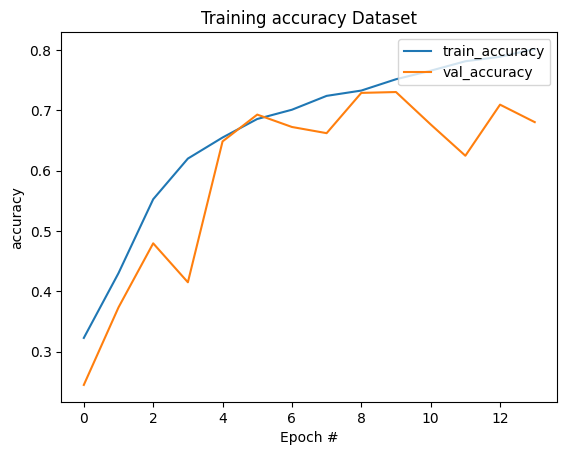

In [ ]:
# Function to plot loss, val_loss,
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

# Plotting the loss vs epoch curve for the basic CNN model without Transfer Learning
plot_history(history)

In [ ]:
accuracy = model_f.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 4ms/step - loss: 0.6186 - accuracy: 0.7344


**Observations and Insights:**

The CNN with as many parameters as the transfer learning models takes a lot more time to train since we are starting from zero. However, the performance of the model has not increase significantly compared to model 2 of the CNN.

## **Chosen Model**

### **Plotting the Confusion Matrix for the chosen final model**

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.69      0.69      0.69        32
           2       0.66      0.78      0.71        32
           3       0.96      0.84      0.90        32

    accuracy                           0.78       128
   macro avg       0.79      0.78      0.79       128
weighted avg       0.79      0.78      0.79       128



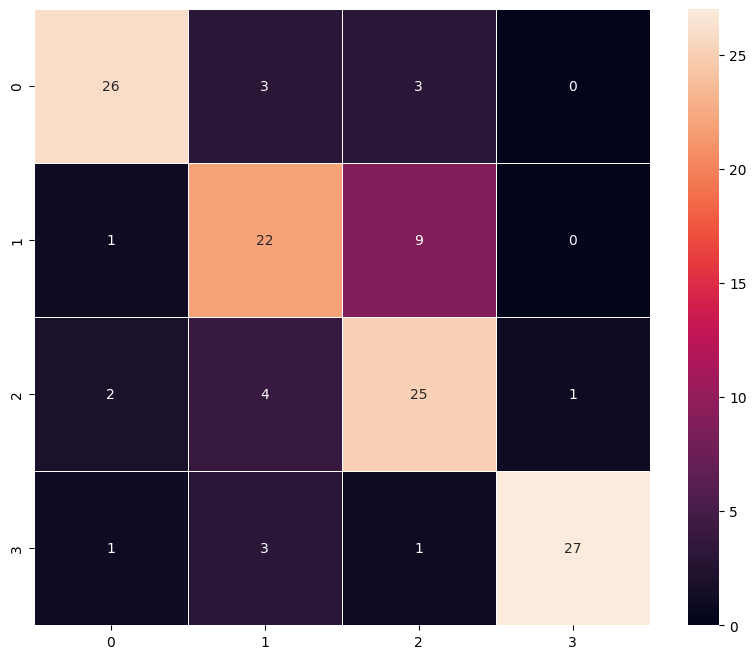

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# predictions on the test set using the second model
y_pred=model_2.predict(X_test_g)

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Classification Report
print(classification_report(y_test_arg, y_pred_arg))

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observations and Insights:**
- Happy images are often misidentified as neutral or sad.
- Neutral images are extremely often misidentified as sad.
- Sad images are often misidentified as neutral
- Surprised images are often misidentified as neutral


## **Fine-tuning the Chosen Model**


### **Augmenting the Entire Dataset**
Data augmentation of the entire dataset to just increase the size of the dataset will not increase the accuracy of the model, it will only make the model more robust. Therefore the dataset will not be augmeted any further.

In [ ]:
training_aug_all_classes = training_data_aug
print(len(training_aug_all_classes))

#Doubling images to every class in the dataset.
for i in range(len(training_data_aug)):
  rand_case = random.randint(1, 6)
  source_img = training_data_aug[i][0]

  match rand_case:
    case 1:
      modified_img = tf.image.flip_left_right(source_img)
    case 2:
      modified_img = tf.image.flip_up_down(source_img)
    case 3:
      rand_offset = random.random()
      modified_img = tf.image.pad_to_bounding_box(source_img, int(rand_offset), 0, picture_size, picture_size)
    case 4:
      rand_offset = random.random()
      modified_img = tf.image.pad_to_bounding_box(source_img, 0, int(rand_offset), picture_size, picture_size)
    case 5: #rotate 90 counter-clockwise
      modified_img = tf.image.rot90(source_img, k=1, name=None)
    case 6: #rotate 270 counter-clockwise
      modified_img = tf.image.rot90(source_img, k=3, name=None)
    case _:
      print("Number not between 1 and 6")

  # print(training_data_aug[i][1])
  training_aug_all_classes.append([modified_img, training_data_aug[i][1]])

print(len(training_aug_all_classes))

15909
31818


#### **Checking the Distribution of the Augmented Dataset**

(48, 48, 3)


[Text(0, 0, '7964'),
 Text(0, 0, '7956'),
 Text(0, 0, '7946'),
 Text(0, 0, '7952')]

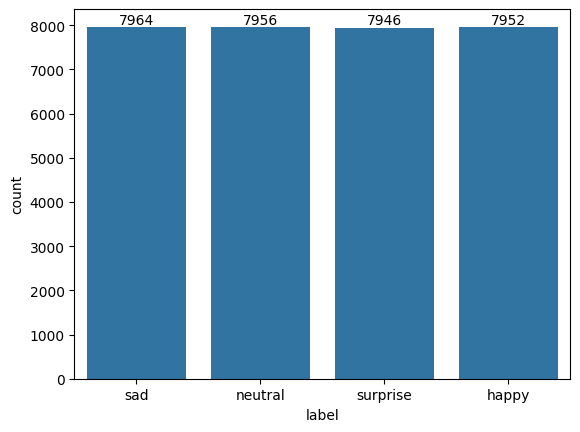

In [ ]:
#Check the Distribution of the Augmented Dataset
training_d_aug = pd.DataFrame(training_aug_all_classes, columns = ['img', 'label'])
print(training_d_aug.iloc[0][0].shape) #dimensions of images

#plot the augmented training data
a3 = sns.countplot(data = training_d_aug, x="label")
a3.bar_label(a3.containers[0])

#### **Prepare Augmented Training Dataset**

In [ ]:
# Creating two different lists to store the Augmented training data
X_train_aug_all = []
y_train_aug_all = []

np.random.shuffle(training_aug_all_classes)                                           # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in training_aug_all_classes:                                      # Iterating over the training data which is generated from the create_training_data() function
    X_train_aug_all.append(features)                                                  # Appending images into X_train_aug_all
    y_train_aug_all.append(label)                                                     # Appending labels into y_train_aug_all

#Create grayscale version of all datasets
X_train_aug_all_g = []

for i in range(len(X_train_aug_all)):
  X_train_aug_all_g.append(tf.image.rgb_to_grayscale(X_train_aug_all[i]))

# Converting the array into Numpy array
X_train_aug_all_g = np.array(X_train_aug_all_g)

# Normalizing the image data
X_train_aug_all_g = X_train_aug_all_g/255.0
print(X_train_aug_all_g.shape)

#Encoding the labels of the Augmented training data
y_train_aug_all = pd.DataFrame(y_train_aug_all)
y_train_aug_all_encoded = []

for label in y_train_aug_all[0]:
  if('happy' in label):
    y_train_aug_all_encoded.append(0)

  if('neutral' in label):
    y_train_aug_all_encoded.append(1)

  if('sad' in label):
    y_train_aug_all_encoded.append(2)

  if('surprise' in label):
    y_train_aug_all_encoded.append(3)

y_train_aug_all_encoded = to_categorical(y_train_aug_all_encoded, 4)
print(len(y_train_aug_all_encoded))

(31818, 48, 48, 1)
31818


#### **Use Augmented Dataset to Train the Chosen Model**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2 = cnn_model_2()

# Generating the summary of the model
model_2.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

# Fit the model
history = model_2.fit(X_train_aug_all_g,
                      y_train_aug_all_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

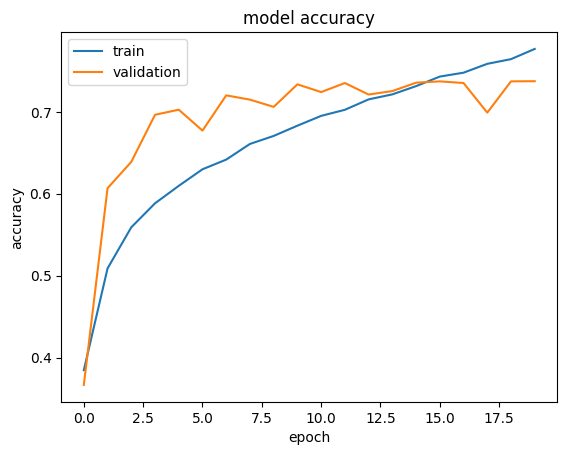

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 21ms/step - loss: 0.6040 - accuracy: 0.7656


#### **Observations:**
As expected, augmenting all classes of the data further did not help to increase the accuracy of the model since the model learnt all the features that it could from the data that was provided to it before the data was augmented.

### **Adjusting Hyperparameters**
In order to make the Chosen CNN more accurate, we will explore fine-tuning the hyperparameters

#### **Playing with Batch_size**

##### **Smaller Batch Size**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=64,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

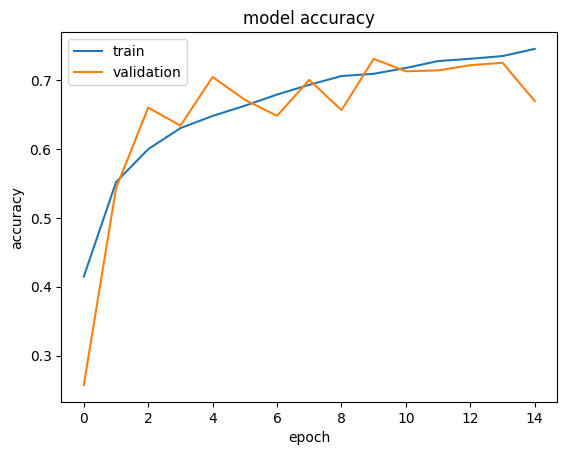

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 13ms/step - loss: 0.6093 - accuracy: 0.7656


##### **Larger Batch Size**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=256,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

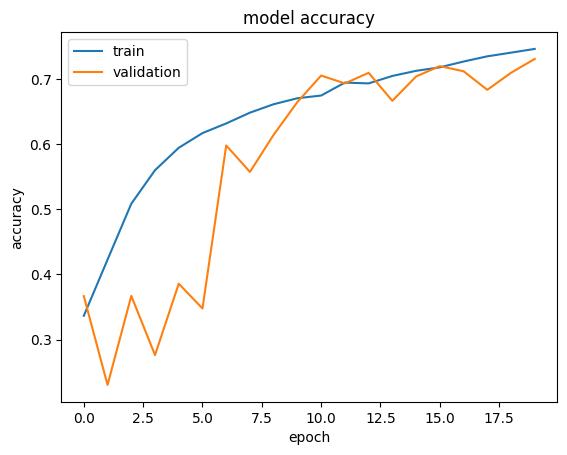

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 12ms/step - loss: 0.7196 - accuracy: 0.7422


4/4 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        32
           1       0.64      0.84      0.73        32
           2       0.70      0.44      0.54        32
           3       1.00      0.81      0.90        32

    accuracy                           0.74       128
   macro avg       0.76      0.74      0.74       128
weighted avg       0.76      0.74      0.74       128



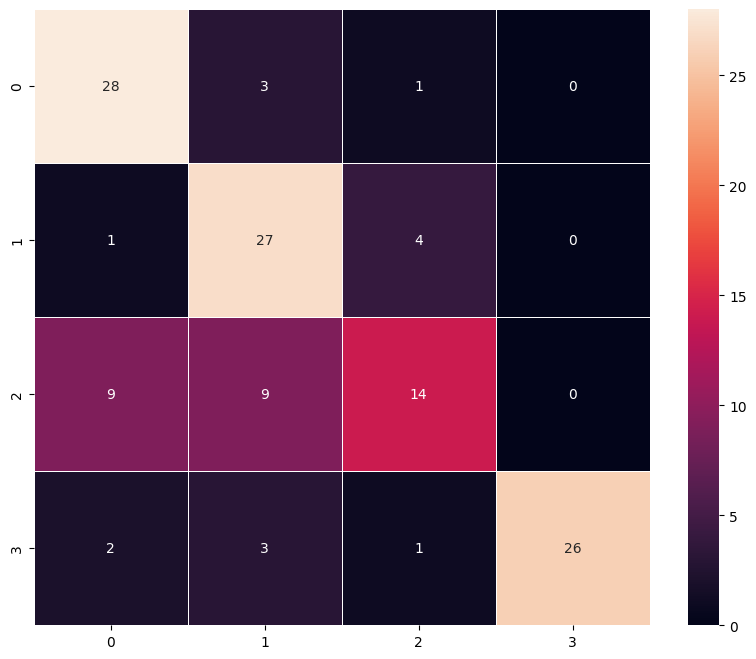

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# predictions on the test set using the second model
y_pred=model_2b.predict(X_test_g)

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Classification Report
print(classification_report(y_test_arg, y_pred_arg))

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

##### **Larger Batch Size with more Epochs**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=256,
                      epochs=30,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

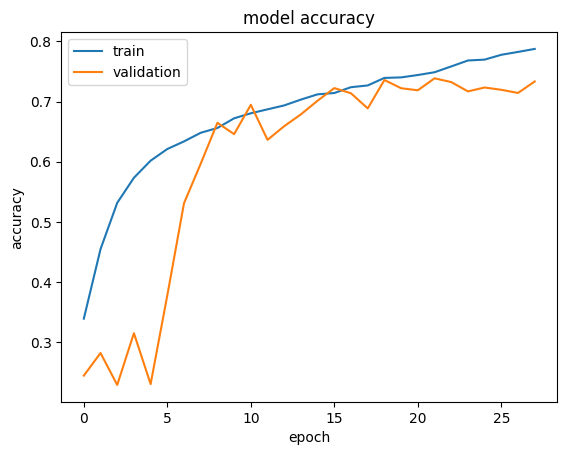

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 17ms/step - loss: 0.6188 - accuracy: 0.7500


##### **Even Larger Batch**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=512,
                      epochs=30,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

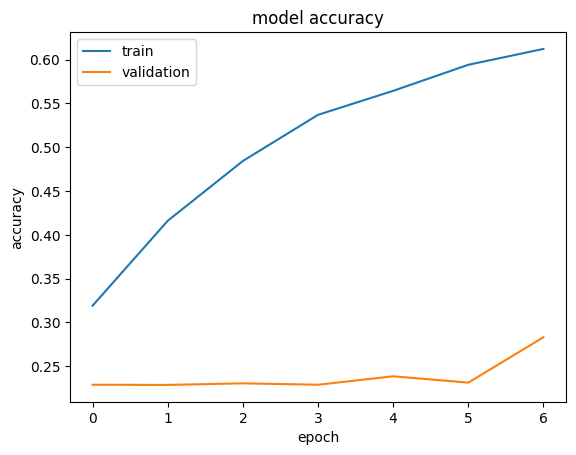

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 12ms/step - loss: 1.4500 - accuracy: 0.2500


##### **Observations:**<br>
**The original batch size of 128 images/batch at 20 epochs resulted in an acuracy of 78.1%.** <br>
A smaller batch size of 64 images/batch at 20 epochs with early stopping resulted in an accuracy of 69.5%. <br>
A larger batch size of 256 images/batch with 20 epochs increased the performance of the model to an accuracy of 74.2%. <br>
When the number of epochs was further increased to 30 epochs with early stopping, the accuracy decreased to 75.0%. <br>
When the batch sizes were further increased to 512 images/batch while retaining 30 epochs with early stopping, the accuracy plummeted to 25.0%

#### **Varying Number of Neurons in Dense Layers of the Model**


##### **Decrease Dense Layer Neurons from 512 to 256**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(256,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

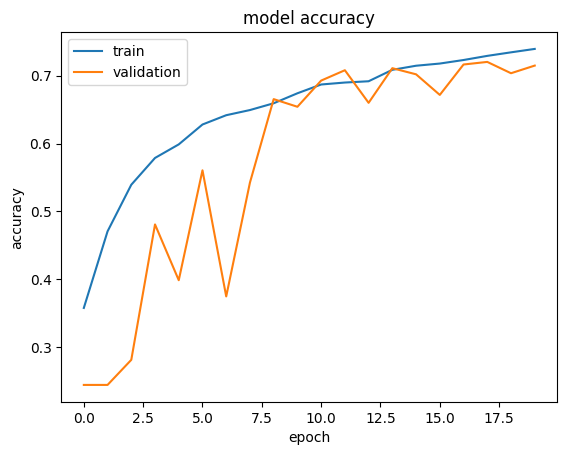

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 16ms/step - loss: 0.6566 - accuracy: 0.7812


##### **Increase Dense Layer Neurons from 512 to 1024**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(1024,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

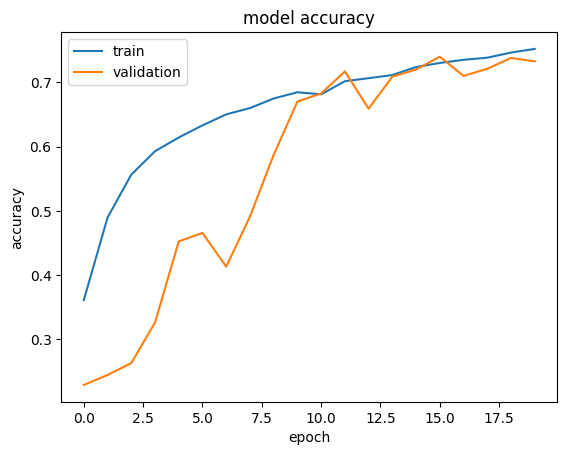

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 20ms/step - loss: 0.6122 - accuracy: 0.7656


##### **Observations**
Number of Neurons in the 5-Layer CNN were altered and these results show that the orignal model's architecture performs with a higher accuracy than the other architectures that were investigated.   

#### **Changing Optimizer and Learning Rate**

##### **SGD**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

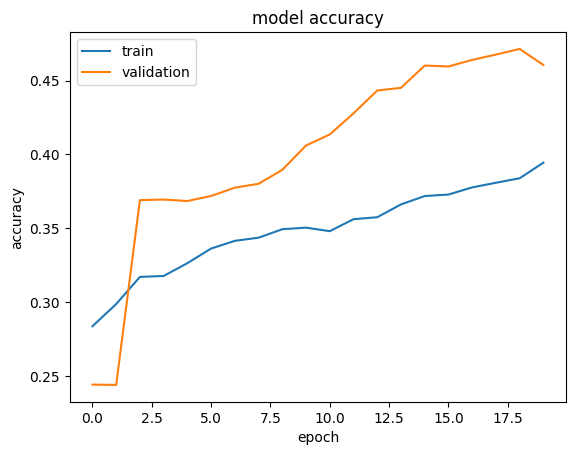

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 15ms/step - loss: 1.2568 - accuracy: 0.4219


###### **SGD with Learning rate 0.01**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.01),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

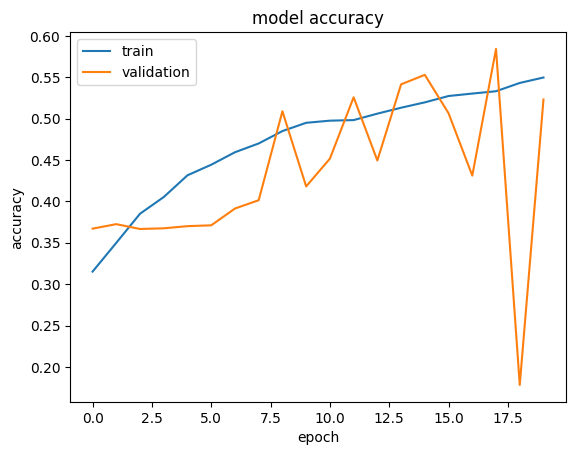

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 17ms/step - loss: 1.2432 - accuracy: 0.4844


###### **SGD with Learning rate 0.0001**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=0.0001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

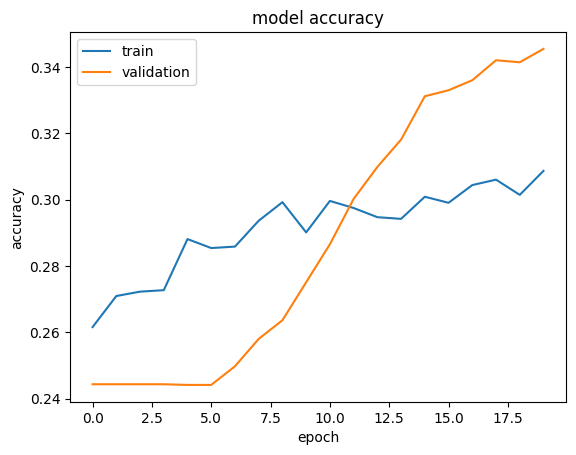

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 15ms/step - loss: 1.3183 - accuracy: 0.3672


##### **Adamax**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adamax(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

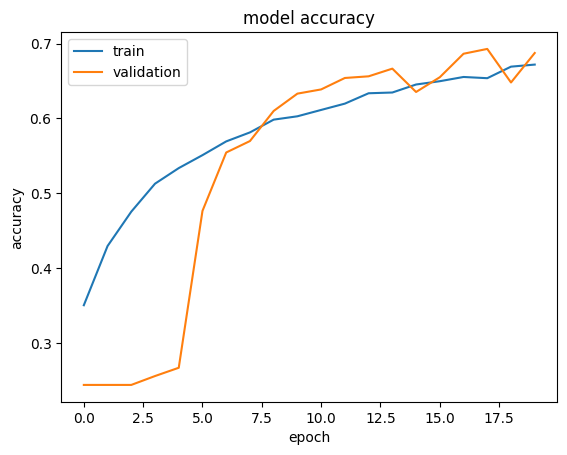

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 17ms/step - loss: 0.7179 - accuracy: 0.7344


###### **Adamax learning rate = 0.005**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adamax(learning_rate=0.005),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

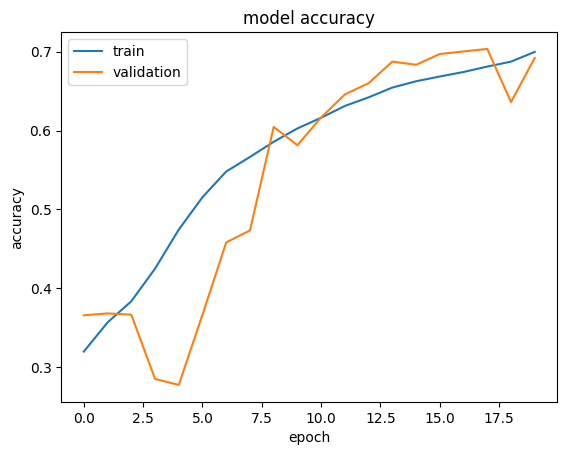

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 16ms/step - loss: 0.7570 - accuracy: 0.7188


###### **Adamax Learning rate = 0.0008**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adamax(learning_rate=0.0008),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

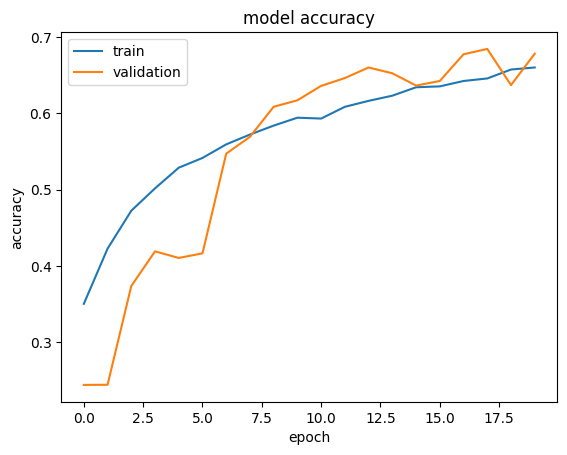

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 16ms/step - loss: 0.7415 - accuracy: 0.7031


##### **RMSprop**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adamax(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

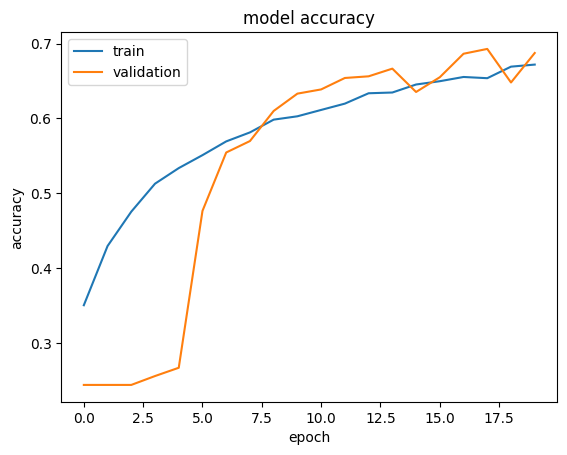

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 15ms/step - loss: 0.7179 - accuracy: 0.7344


###### **RMSprop learning rate = 0.0008**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adamax(learning_rate=0.0008),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

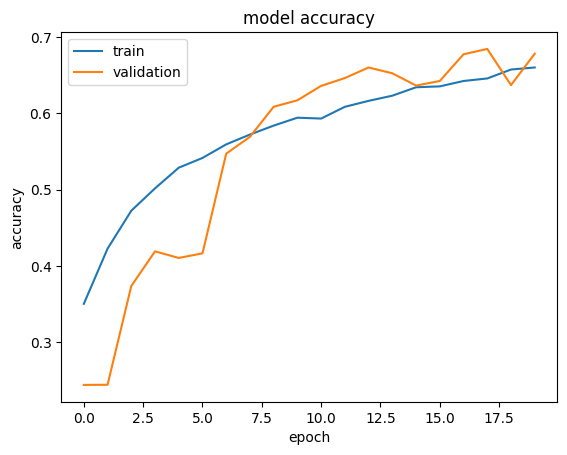

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 16ms/step - loss: 0.7415 - accuracy: 0.7031


##### **Adam with learning rate of 0.005**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.005),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

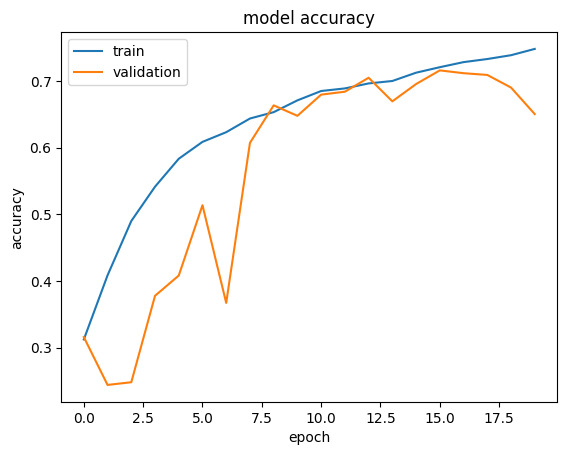

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 15ms/step - loss: 0.6826 - accuracy: 0.7578


###### **Adam with learning rate of 0.0008**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = 'relu'))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.0008),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

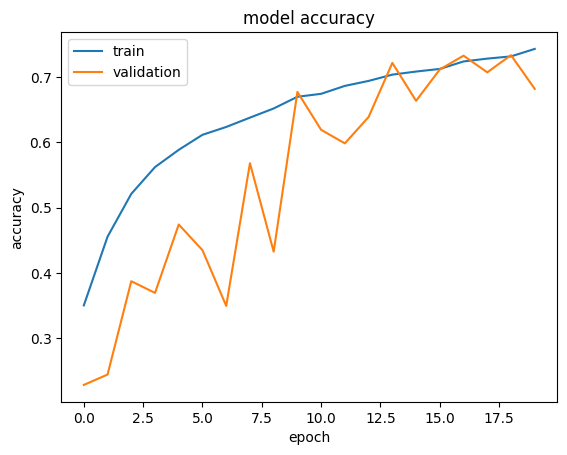

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 14ms/step - loss: 0.9461 - accuracy: 0.6562


##### **Observations**

- SGD
  - with learning rate of 0.0001 = 48.4%
  - with learning rate of 0.001 = 42.2%
  - with learning rate of 0.01 = 48.4%

- Adamax
  - with learning rate of 0.0008 = 70.3%
  - with learning rate of 0.001 = 73.4%
  - with learning rate of 0.005 = 71.9%

- RMSprop
  - with learning rate of 0.0008 = 70.3%
  - with learning rate of 0.001 = 73.4%

- Adam
  - with learning rate of 0.0008 = 65.6%
  - with learning rate of 0.001 = 78.1%
  - with learning rate of 0.005 = 75.8%

#### **Changing the CNN Model's Activation Functions**

###### **Sigmoid**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

activation_fn = 'sigmoid'

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation=activation_fn, padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation=activation_fn, padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = activation_fn))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

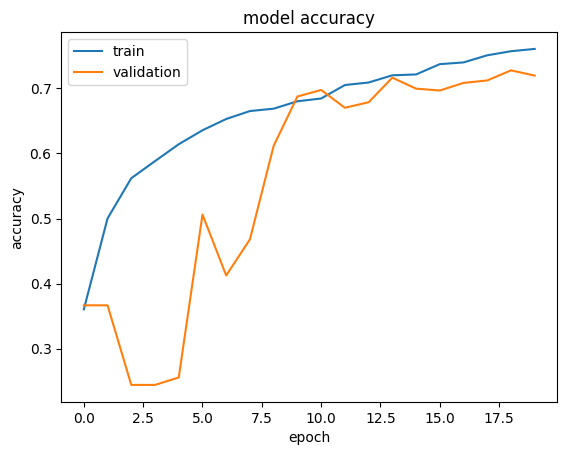

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 22ms/step - loss: 0.6693 - accuracy: 0.7188


###### **Tanh**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

activation_fn = 'tanh'

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation=activation_fn, padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation=activation_fn, padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = activation_fn))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

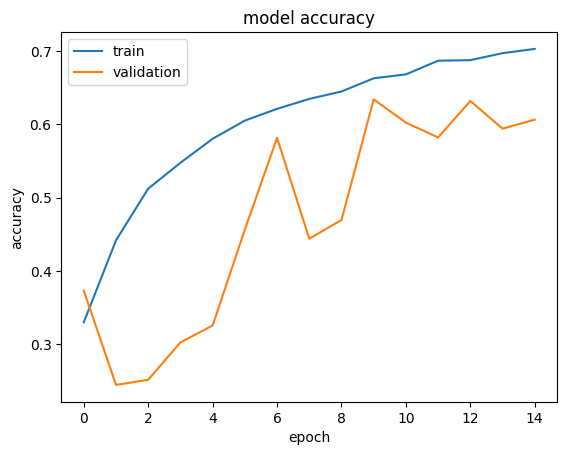

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 19ms/step - loss: 0.9175 - accuracy: 0.5859


###### **Selu**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

activation_fn = 'selu'

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation=activation_fn, padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation=activation_fn, padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = activation_fn))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

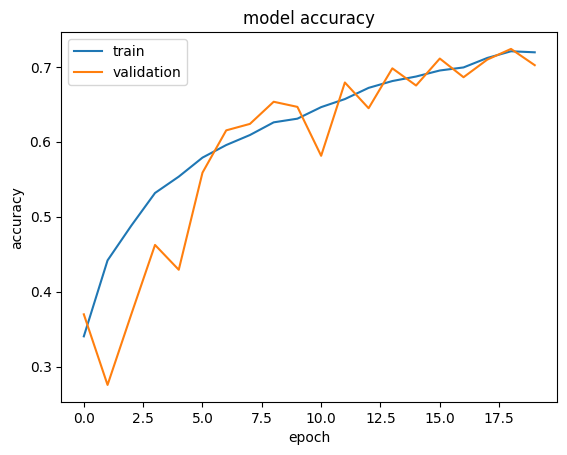

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 21ms/step - loss: 0.6566 - accuracy: 0.7266


###### **Leaky Relu**

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

activation_fn = 'leaky_relu'

def cnn_model_2b():
  # Intializing a sequential model
  model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
  # Input_shape denotes input image dimension of images
  model.add(Conv2D(32, (3, 3), activation=activation_fn, padding="same", input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Second hidden layer 32 filters and kernel size 3x3 , padding 'same
  model.add(Conv2D(64, (3, 3), activation=activation_fn, padding="same"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Third Convolutional Block
  model.add(Conv2D(64, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fourth Convolutional Block
  model.add(Conv2D(128, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  model.add(Dropout(0.25))

  # Fifth Convolutional Block
  model.add(Conv2D(256, (3, 3), padding = 'same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2), padding = 'same'))
  # model.add(Dropout(0.25))

  model.add(Flatten())

  # Fully Connected Block
  model.add(Dense(512,activation = activation_fn))
  # model.add(BatchNormalization())
  # model.add(Dropout(0.25))

  # Output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(4, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

  return model

#Call create model function
model_2b = cnn_model_2b()

# Generating the summary of the model
model_2b.summary()

validation_tuple = ((X_val_g), (y_val_encoded))
print(len(validation_tuple))

earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",                             #In min mode, training will stop when the value of data that is monitored stop decreasing.
                                        patience=5,                             #the number of times it should not stop when it encounters a value that is below than minDelta.
                                        restore_best_weights=True)              # It tells whether to restore the best value from the monitored quantity in each epoch or not.

# Fit the model
history = model_2b.fit(X_train_g,
                      y_train_encoded,
                      validation_data = validation_tuple,
                      batch_size=128,
                      epochs=20,
                      callbacks=[earlystopping],
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        2

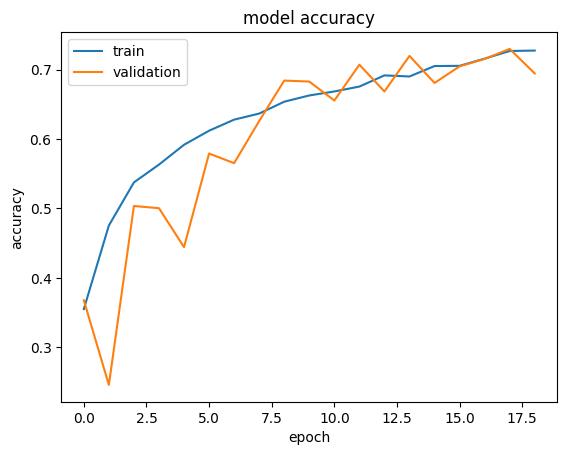

In [ ]:
# Plotting the training and validation accuracies for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model_2b.evaluate(X_test_g, y_test_encoded, verbose = 1)

4/4 [==============================] - 0s 19ms/step - loss: 0.6846 - accuracy: 0.7422


###### **Observations**
- Relu = 78.1%
- Sigmoid = 71.9%
- Tanh = 58.6%
- Selu = 72.7%
- Leaky Relu = 74.2%

## **Conclusion:**

1. Executive Summary (15 points)
• Most important findings from the analysis done in Milestone
   ◦ Clearly summarize the key insights derived from the previous analyses.
• Final proposed model specifications
   ◦ Provide a detailed description of the final model including its specifications and parameters.
• Key next steps
   ◦ Outline the actionable next steps based on the findings and proposed model.
2. Problem and Solution Summary (10 points)
• Summary of the problem
   ◦ Concisely describe the problem that the project aimed to solve.
• Reason for the proposed solution design
   ◦ Explain the rationale behind the chosen solution design, including the key points that describe the final proposed solution.
• Impact on the problem/business
   ◦ Discuss how the proposed solution addresses the problem and the potential positive impact on the business.
• Validation of the solution
   ◦ Justify why the proposed solution is valid and likely to be effective in solving the problem.
3. Recommendations for Implementation (Points: Variable)
• Key recommendations
   ◦ Provide detailed recommendations for implementing the proposed solution.
• Key actionables for stakeholders
   ◦ List specific action items for stakeholders to follow in implementing the solution.
• Benefits and/or costs
   ◦ Outline the benefits of the proposed solution and provide a rational estimation of costs and benefits for stakeholders.
• Key risks and challenges
   ◦ Identify potential risks and challenges associated with the proposed solution and suggest ways to mitigate them.
• Further analysis needed
   ◦ Indicate any additional analysis required or other associated problems that need to be addressed.

### **Executive Summary**
- What are the most meaningful insights from the data relevant to the problem? <br>

**Ans:** <br>
- the use of rgb format of the images had little to no effect on the accuracy of the models.
- the dataset provided contained a training set that was unbalanced. Balancing the training data led to higher accuracy performance of the models.
- the dataset provided's size was on the smaller side and could be increased using augmented data techniques to improve the performance of the models.
- Transfer learning models taken straight out of the box had lower performance than the custom CNN. This is could be due to a number of factors. One factor could be that the models use aspect of colored features to differentiate between the classes. A second and the main factor is the fact that the transfer learning model weights were obtained using images that are not necessarily of human faces and therefore has not been optimized for application of differentiating between different facial expressions.

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**Ans:** <br>
Model_a for the base CNN model resulted in an accuracy of 70.3% on the test dataset when trained using rgb images and resulted in an accuracy of 74.2% when trained using greyscale images. Therefore it is best to keep using the greyscale images to reduce the execution time.<br>

Model_b for the slightly more complex CNN model resulted in an accuracy of 78% of the test dataset using greyscale images at 73ms/step.<br>

VGG_model resulted in an accuracy of 50.7% on the test dataset<br>

Resnet model resulted in an accuracy of 57.8% on the test dataset <br>

Efficient model resulted in an accuracy of 59.4% on the test dataset <br>

The CNN with the approximate equivalent number of parameters as the transfer learning models resulted in a similar accuracy as model_b.

Therefore, model_b has performed the best amongst the models that were evaluated. Model_b's performance can be improved with a further augmented dataset.

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

**Ans:** Based on the models that were generated, the CNN model of five layers using 3x3 kernels, the relu activation function, with batch normalization, max pooling and dropout of 25% of the neurons between each layer resulted in the highest accuracy on the test data. The model was compiled with the Adam optimizer with a learning rate of 0.001. Training the model on the augmented balanced training data of 128 images/batch performed the best on the test dataset and each epoch took only around 1 second to run. Therefore it provides that best accuracy with an appropriate implementation time.



### **Problem and Solution Summary**

### **Summary of the Problem**
The problem we will attempt to tackle is the following:<br>
User research methods that involve the evaluation of emotions are currently subjective and rely on the researcher's accurate reporting of users' emotional states while interacting with a product.

### **Reason for the Proposed Solution Design**
The targeted users of the problem are any company's research and development team. Most users within this targetted population would not necessarily have the software skills to interact directly with an API. Therefore, a web application should be built to allow users to feed a video of their participant's reactions to interview questions to the application. Individual frames of the video can be fed to the trained model so that it can then make a prediction which can then be recorded and exported in a final report. An added feature to the web application to make it more valuable to the end-user is to implement eye-tracking software into the system so that the trigger for the different emotions can be identified for mobile or desktop software products.

### **Impact on the Problem/Business**
The proposed solution
- ensures results are as objective as possible
- reduces the costs required to run a user research study by reducing the number of people required to run a user research study
- reduces the amount of time to process study results after the sessions are completed

### **Validation of the Solution**
The proposed solution is valid as long as the model is as accurate as a human observer. The current proposed solution has an accuracy of 79% which is almost equivalent to the accuracy of human observers of 72.5% as reported in the following article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7182192/  
Having such a solution also allows the study to automatically obtain the results of the interview sessions. Thus cutting down the time rquired to analyze the results of each session. Furthermore, such a solution allows the business to run a user research study without the need of an user research observer, saving the business money.




### **Recommendations for Implementation**

### **Key Recommendations for Implementing the Solution**
- Clean up the existing dataset to remove all images of cartoons and to correct all mislabelled images.
- Enlarge the training dataset by leveraging open-source datasets that are widely available for free
- Actively obtain more images of individuals of color of all ages as this is a part of the population that is sorely underrepresented in the existing dataset.
- Add images to the dataset that represent the other basic emotions of anger, fear and disgust.
- Create a user-friendly interface for non-code individuals
- Host the application on the web so that anyone can access it using either a phone or a laptop since user studies are often not conducted at a central locations that are not the company's corporate site.
- Combine the model with eye-tracking hardware and software to obtain insights into what triggers each recorded emotion

### **Key Action Items for Stakeholders that are Required in order to Implement the Solution**
- Give the go-ahead for funding the solution
- Investigate partnering with companies that might have the ressources to train a model on a much larger Dataset or who might already have a dataset that can be leveraged.
- Fund costs to host a web application taking future scalability into consideration


### **Benefit and/or Costs**
- Costs:
  - Costs to optmize the model's performance
    - Costs of an A100 chip: \$10, 000
    - Labour Costs to create a Larger Dataset = 9.2k over 2 months
    - Labour Costs to train a model using the larger dataset = 12.5k over 1 month
  - Costs to create a web application = 12.5k over 3 months
  - Deployment Costs to allow for scalability: ~\$94.5k for first 5 years (\$18.9k per year) reference: https://www.phdata.io/blog/what-is-the-cost-to-deploy-and-maintain-a-machine-learning-model/
  - Total Costs afer 1 year of service = ~$63k


- Benefits:
  - Opportunity to save $308 per study participant (Savings of 2 hours per participant); Therefore you can price the product at a monthly subscription of \$225 or an annual subscription of \$2,500/year
  - Opportunity to have objective evidence to make business decisions

Sample Calculations:
- Costs for the client to run a study without the proposed solution:
  - Personnel costs (Moderator & Observer & Support): \$115.5/hour
  - 1 session: 1.5 hours per participant
  - Additional time to compile individual results: 2.5 hours per participant
  - Total Costs: 80 hours x \$115.5 = \$9,240

- Costs for the client to run a study with the proposed solution:
  - Personnel costs (Moderator & Support): \$77/hour
  - 1 session: 1.5 hours per participant
  - Additional time to compile individual results: 0.5 hours per participant
  - Total Costs: 40 hours x \$77 = \$3,080
  - Opportunity to save \$308 per participant;


### **Key Risks and Challenges of the Proposed Solution**
- The user would loose access to product if the internet connection is not stable. There unfortunately is no way for the business to mitigate this risk.
- The model will sometimes confound emotions, especially ones that manifest in subtle changes in facial expressions. This can be mitigated by asking for human intervention whenever a class of a certain emotion that yields poor precision and recall (such as the neutral emotion in this case).

### **Further Analysis / Next Steps**
- Review the current dataset to correct mislabelled images and to remove cartoon images
- Obtain/create a larger unbiased balanced Dataset:
  - to include additional basic emotions of anger, fear and disgust.
  - to include more images of individuals of different races.
- Investigate if training one of the transfer learning models from scratch using the dataset would improve the performance
- Combine the model with eye-tracking hardware and software to obtain insights into what triggers each recorded emotion.
- Look into partnering with another company (ex: Google) who could provide the necessary computational hardware to train the model.

